#### 1. Busiiness Understanding:

#### 2.Data Understanding

In [1]:
import pandas as pd
import numpy as np
import random
random.seed(4)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder ,StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report , confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/heartcsv/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: >

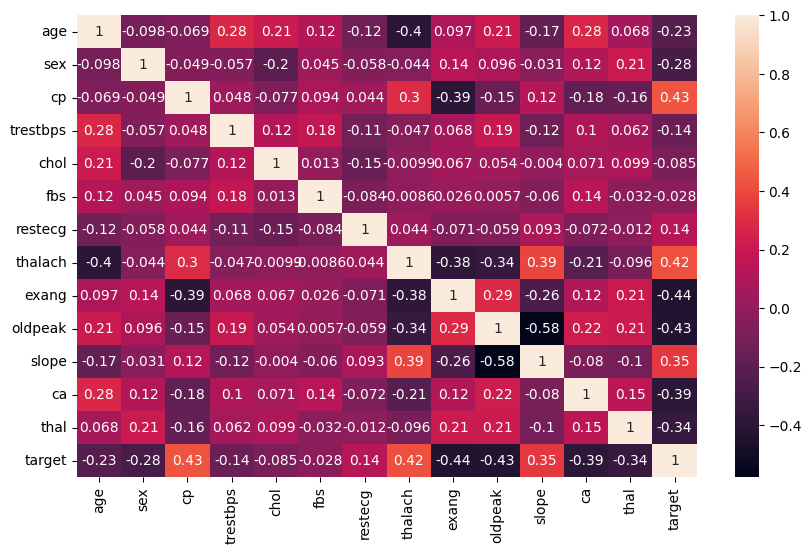

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

### Data Prepration

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.duplicated().any()

np.True_

In [13]:
df=df.drop_duplicates()

In [14]:
df.duplicated().any()

np.False_

In [15]:
df.shape

(302, 14)

#### Data Preprocessing:

In [16]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [19]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [21]:
x=df.drop('target',axis=1)

In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0,0.478910,-0.106449,0,1,-1.161988,1,-0.727060,1,0,3
299,-1.042904,1,3,-1.232023,0.338703,0,1,-0.768384,0,0.135360,1,0,3
300,1.503322,1,0,0.707035,-1.035462,1,1,-0.374779,0,2.032684,1,2,3
301,0.285561,1,0,-0.091401,-2.235438,0,1,-1.511859,1,0.135360,1,1,3


In [23]:
y=df['target']

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,-1.375021,1,1,-0.661712,0.938690,0,1,0.543632,0,-0.899544,2,0,2
203,1.503322,1,2,2.760154,0.532247,1,0,0.018826,1,0.480328,1,0,3
197,1.392616,1,0,-0.376556,0.145158,1,1,0.587366,0,-0.727060,1,2,3
75,0.064151,0,1,0.193755,0.067741,0,0,0.499898,0,0.307844,1,0,2
177,1.060500,1,2,0.478910,1.712868,0,1,0.368697,0,-0.899544,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1.485726,1,0,-1.232023,-1.441906,0,0,0.368697,0,-0.899544,2,0,3
71,-0.378671,1,2,-2.144521,-0.377412,0,1,0.193761,1,-0.899544,2,1,3
106,1.614027,1,3,1.619532,-0.241930,1,0,-0.812118,0,-0.813302,1,1,2
271,0.728383,1,3,0.136724,-0.241930,0,1,-0.199843,0,1.342748,1,2,2


In [27]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

#### EDA

In [28]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

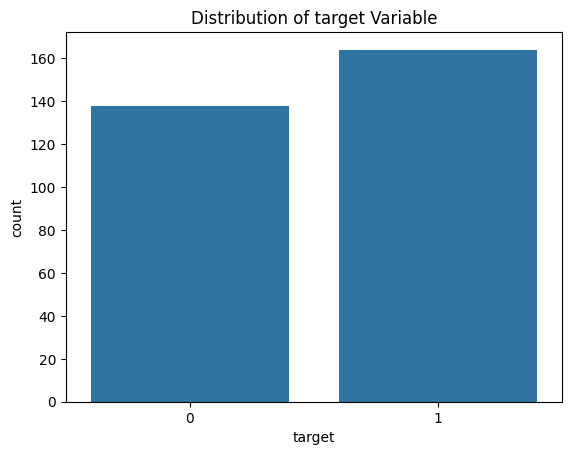

In [29]:
sns.countplot(x='target',data=df)
plt.title('Distribution of target Variable')
plt.show()

#### 1 heart disease present
#### 0 Heart disease present

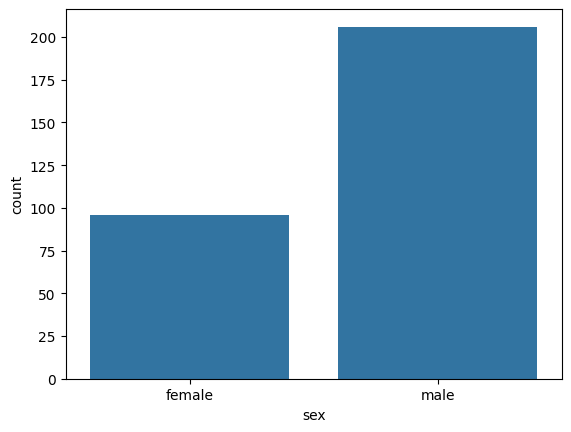

In [30]:
sns.countplot(x='sex',data=df)
plt.xticks([0,1],['female','male'])
plt.show()

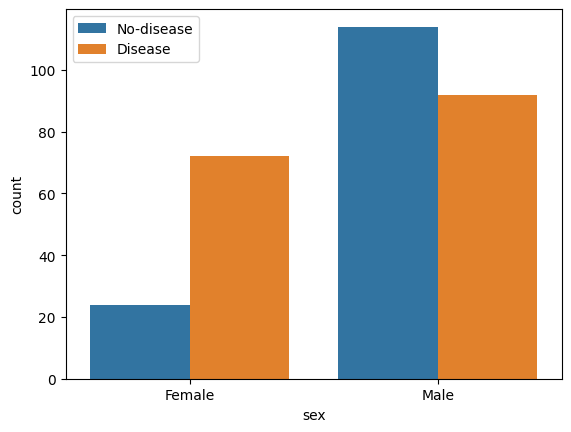

In [31]:
sns.countplot(x='sex',hue='target',data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

#### Check Chest pain type#### chest pain type(4 values)
#### value o:atypical angina
#### value1:atypical angina
#### value2:non-anginal pain
#### value3:asymptomatic

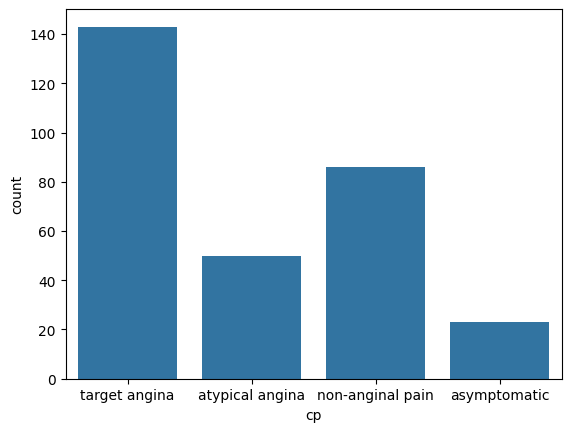

In [32]:
sns.countplot(x='cp',data=df)
plt.xticks([0,1,2,3],['target angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

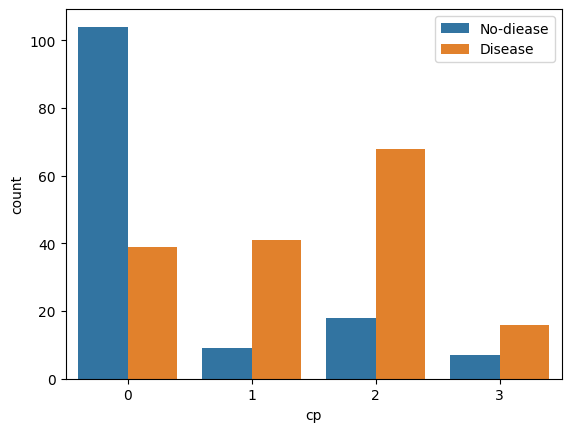

In [33]:
sns.countplot(x='cp',hue='target',data=df)
plt.legend(labels=['No-diease','Disease'])
plt.show()

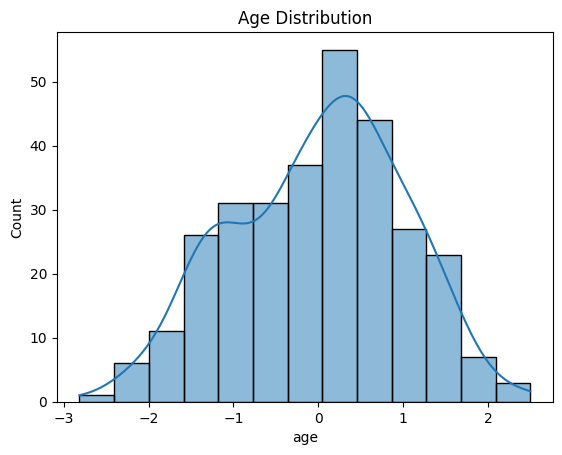

In [34]:
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

#### **** Model Selection

In [35]:
log_reg_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('logistic_regression',LogisticRegression())
])

In [36]:
log_reg_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [37]:
log_reg_pipeline.fit(x_train,y_train)
y_pred_log_reg=log_reg_pipeline.predict(x_test)

In [38]:
cv_scores=cross_val_score(log_reg_pipeline,x,y,cv=5,scoring='accuracy')
print('Cross-Validation Accuracy Scores:',cv_scores)
print('Mean CV Accuracy:',cv_scores.mean())

Cross-Validation Accuracy Scores: [0.81967213 0.8852459  0.81666667 0.88333333 0.76666667]
Mean CV Accuracy: 0.8343169398907104


In [39]:
conf_matrix=confusion_matrix(y_test,y_pred_log_reg)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[24  5]
 [ 6 26]]


In [40]:
print('Logistic Regression Report:')
print(classification_report(y_test,y_pred_log_reg))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [41]:
tree_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('decision_tree',DecisionTreeClassifier())
])

In [42]:
tree_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('decision_tree', DecisionTreeClassifier())])

In [43]:
tree_pipeline.fit(x_train,y_train)
y_pred_tree=tree_pipeline.predict(x_test)

In [44]:
cv_scores1=cross_val_score(tree_pipeline,x,y,cv=5,scoring='accuracy')
print("Cross-Validation Accuracy Scores:",cv_scores1)
print("Mean CV Acurracy:",cv_scores1.mean())

Cross-Validation Accuracy Scores: [0.73770492 0.85245902 0.71666667 0.66666667 0.71666667]
Mean CV Acurracy: 0.7380327868852459


In [45]:
conf_matrix=confusion_matrix(y_test,y_pred_tree)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[25  4]
 [ 8 24]]


In [46]:
print('Decision Tree Report:')
print(classification_report(y_test,y_pred_tree))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



#### Using the Random forest classifier

In [47]:
rf_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('random_forest',RandomForestClassifier())
])

In [48]:
rf_pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('random_forest', RandomForestClassifier())])

In [49]:
rf_pipeline.fit(x_train,y_train)
y_pred_rf=rf_pipeline.predict(x_test)

In [50]:
cv_scores2=cross_val_score(rf_pipeline,x,y,cv=5,scoring='accuracy')
print('Cross-Validation Accuracy Scores:',cv_scores2)
print('Mean CV Accurracy:',cv_scores2.mean())

Cross-Validation Accuracy Scores: [0.81967213 0.90163934 0.81666667 0.81666667 0.76666667]
Mean CV Accurracy: 0.8242622950819671


In [51]:
conf_matrix=confusion_matrix(y_test,y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[25  4]
 [ 4 28]]


In [52]:
print('Random Forest Report:')
print(classification_report(y_test,y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### Compairing the above three models on the basis of the mean cv accuracy

In [53]:
log_reg_mean=cv_scores.mean()
tree_mean=cv_scores1.mean()
rf_mean=cv_scores2.mean()

print(f"Logistic Regression Mean Accuracy:{log_reg_mean:.4f}")
print(f"Decision Tree Mean Accuracy:{tree_mean:.4f}")
print(f"Random Forest Mean Accuracy:{rf_mean:.4f}")

Logistic Regression Mean Accuracy:0.8343
Decision Tree Mean Accuracy:0.7380
Random Forest Mean Accuracy:0.8243


#### As per the above comparison we choose the Logistic regression model

In [54]:
lsr=LogisticRegression()
lsr.fit(x,y)

LogisticRegression()

In [55]:
lsr=RandomForestClassifier()
lsr.fit(x,y)

RandomForestClassifier()

#### Prediction on new data

In [56]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [57]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


### p=lsr.predict(new_data)
print(p)
if p==0:
    print('No Disease')
else:
    print('Disease')